# Exploratory Data Analysis - Cook County Sentencing Dataset
## A Story of [Race,] Crime and Punishment
This Exploratory Data Analysis attempts to display interesting trends found in the Cook County [Sentencing Dataset](https://datacatalog.cookcountyil.gov/Courts/Sentencing/tg8v-tm6u) including those on race, age, and gender.<br><br>
Before we dive into the data, this is a brief excerpt of Cook County taken from [Wikipedia]((https://en.wikipedia.org/wiki/Cook_County,_Illinois)):
>Cook County is the most populous county in the U.S. state of Illinois and the second-most-populous county in the United States after Los Angeles County, California.<br>
Its county seat is Chicago, the most populous city in Illinois and the third-most-populous city in the United States.

The Cook County Sentencing Dataset is made available through [Cook County Government Open Data Portal](https://datacatalog.cookcountyil.gov/) which describes it as follows:
>The sentencing data presented in this report reflects the judgment imposed by the court on people that have been found guilty.<br>
Each row represents a charge that has been sentenced.

### Notes about this Dataset
This is a large dataset of 236,000 examples containing, among other features, race, age, gender, offense commited and punishment imposed.<br>
Most of the examples dates to between \<insert date range\>.
<br>
<br>
From a data analyst's perspective, this dataset has a few drawbacks:
- First: There is no documentation beyond a short and often unhelpful description of each column.
- Second: There is no information on whether this dataset is complete
- Third: There obvious errors which could be determined from the context of the other columns of an example.
- Fourth: The data is inconsistent between rows, For instance, a Life Sentence can appear in one of two columns.

Despite these issues, this dataset is an important resource given the broad societal and political implications of the events that underlie each data point.<br>
It is made all the more valuable given I couldn't find a similar public dataset published by another government anywhere in the world.<br>
This is surprising given how useful this dataset is - but perhaps it is not in the best interests of governments to hand over such data voluntarily.<br>
This particular dataset, for instance, shows the very significant relationship between race and crime which is already [well documented](https://en.wikipedia.org/wiki/Race_and_crime_in_the_United_States).

### Data Cleaning
I have manually inspected and analyzed the dataset (see Preliminary_Exploratory_data_analysis.ipynb) for errors and either removed the offending rows or tried to coerce it to a reasonable value where possible.<br>
Around 2% of the original rows were found to have errors and discarded. The actual number of rows with errors is almost certainly higher because
societal and political importance.<br>
I have made several assumptions in cleaning the data which can be seen in the Sentencing_data_cleaning.ipynb notebook.

### Warnings on the analysis of this Dataset
A significant issue with this dataset is that no information is provided on whether this dataset is complete, and if not, whether the sampling is unbiased.<br>
This makes any conclusion drawn from this dataset potentially unrepresentative of crime in general in Cook County.<br>
I have looked for obvious biases in the dataset (see Preliminary_exploratory_data_analysis.ipynb) and not found obvious signs that the sampling is skewed.<br>
Going forward, I will assume that the dataset is a representative sample.

### I am not a Lawyer
Being a Computer Science major and having a fairly limited understanding of the judicial system, I have had to learn quite through the internet to make sense of this dataset.<br>
That said, it is certainly possible that I misinterpret the data.<br>

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [140]:
import missingno
import seaborn
plt.style.use('ggplot')

In [141]:
import plotly.graph_objects as go

In [144]:
pd.options.display.max_columns = None  # to force pandas to display all columns

pd.options.display.max_rows = None  # to force pandas to display all rows.
# Warning: always remember to use .head() when looking at complete dataset to avoid displaying all rows.

In [142]:
# Read Processed Cook County Sentencing Data
sentencing_processed = pd.read_csv("Sentencing_processed_data.csv",
                                  parse_dates=["DISPOSITION_DATE", "SENTENCE_DATE",
                                                 "INCIDENT_BEGIN_DATE", "INCIDENT_END_DATE",
                                                 "ARREST_DATE", "ARRAIGNMENT_DATE", "RECEIVED_DATE"],
                                  index_col=0)

C:\Users\minur\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning:

Columns (8,9,12,15) have mixed types. Specify dtype option on import or set low_memory=False.



In [381]:
cook_county_population = 5_194_675
race_percentages = {"Population Count": np.array([.554, .248, .24, .062])*cook_county_population, "Sentencing Count": [32456, 153570, 42015, 1356]}
populations = pd.DataFrame(data = race_percentages, index=["White", "Black", "Hispanic", "Asian"])
# Note: dropping other races

# normalize columns to percentages
populations.loc[:,"Population Percentage"] = 100*populations["Population Count"]/(populations["Population Count"].sum())
populations.loc[:,"Sentencing Percentage"] = 100*populations["Sentencing Count"]/(populations["Sentencing Count"].sum())

In [382]:
populations

Population Count  Sentencing Count  Population Percentage  \
White           2877849.95             32456              50.181159   
Black           1288279.40            153570              22.463768   
Hispanic        1246722.00             42015              21.739130   
Asian            322069.85              1356               5.615942   

          Sentencing Percentage  
White                 14.148398  
Black                 66.945078  
Hispanic              18.315410  
Asian                  0.591115

In [383]:
populations["Population Count"]/(populations["Population Count"].sum())

White       0.501812
Black       0.224638
Hispanic    0.217391
Asian       0.056159
Name: Population Count, dtype: float64

In [384]:
populations.loc["White",["Population Percentage", "Sentencing Percentage"]]

Population Percentage    50.181159
Sentencing Percentage    14.148398
Name: White, dtype: float64

In [386]:
populations

Population Count  Sentencing Count  Population Percentage  \
White           2877849.95             32456              50.181159   
Black           1288279.40            153570              22.463768   
Hispanic        1246722.00             42015              21.739130   
Asian            322069.85              1356               5.615942   

          Sentencing Percentage  
White                 14.148398  
Black                 66.945078  
Hispanic              18.315410  
Asian                  0.591115

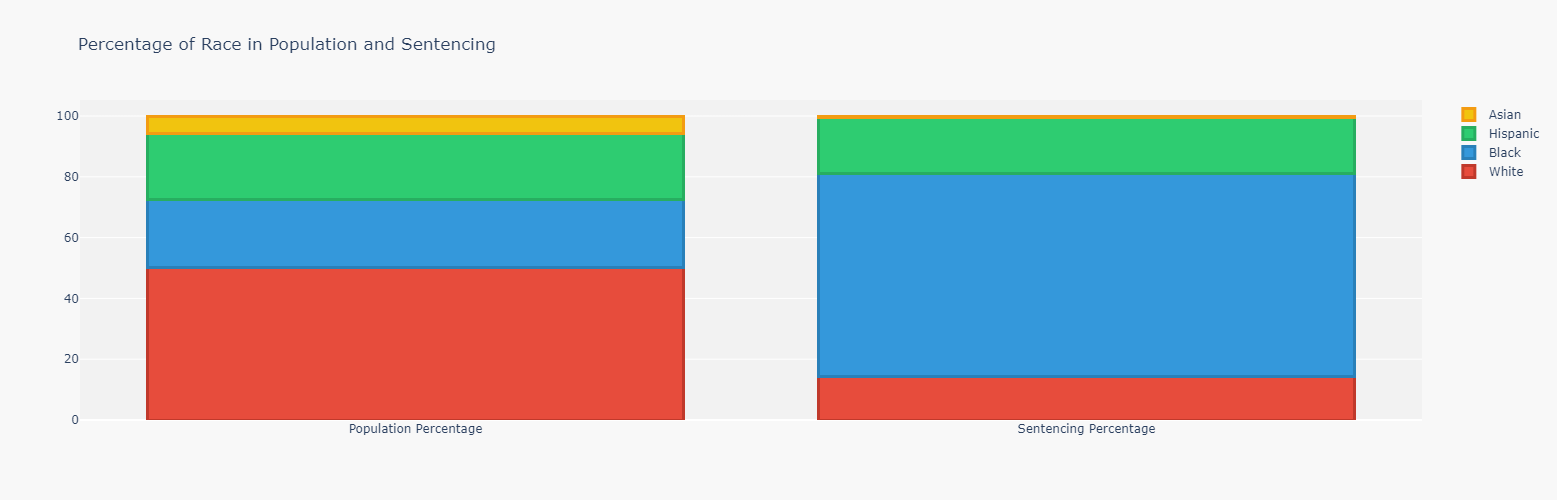

In [432]:
import plotly.graph_objects as go
columns_to_get = ["Population Percentage", "Sentencing Percentage"]
white = populations.loc["White",columns_to_get]
black = populations.loc["Black",columns_to_get]
hispanic = populations.loc["Hispanic",columns_to_get]
asian = populations.loc["Asian",columns_to_get]

fig = go.Figure(data=[
    go.Bar(name='White',
           y=white,
           x=columns_to_get,
           orientation='v',
           marker=dict(
               color='#e74c3c',
               line=dict(color='#c0392b', width=3)
           )),
    go.Bar(name='Black',
           y=black,
           x=columns_to_get,
           orientation='v',
           marker=dict(
               color='#3498db',
               line=dict(color='#2980b9', width=3)
           )),
#     go.Bar(name='Black', y=columns_to_get, x=black, orientation='h'),
    go.Bar(name='Hispanic',
           y=hispanic,
           x=columns_to_get,
           orientation='v',
           marker=dict(
               color='#2ecc71',
               line=dict(color='#27ae60', width=3)
           )),
    go.Bar(name='Asian',
           y=asian,
           x=columns_to_get,
           orientation='v',
              marker=dict(
               color='#f1c40f',
               line=dict(color='#f39c12', width=3)
           ))
])
# Change the bar mode
# fig.update_layout(barmode='stack')
fig.update_layout(barmode='stack', title_text="Percentage of Race in Population and Sentencing ", font_size=12, height=500, width = 600)
# fig.layout.template = 'ggplot2'

fig.update_layout({
'plot_bgcolor': '#F2F2F2',
'paper_bgcolor': '#F8F8F8',
})
fig.show()


# Background #ecf0f1
# f19c79, c68064
# D4E09B, AEB87F
# f4f097, c8c57c
# bcd7dd, 9ab0b5

In [145]:
# # Top categories for UPDATED_OFFENSE_CATEGORY
# num_top_categories = 20
# categories = sentencing_processed["UPDATED_OFFENSE_CATEGORY"].value_counts().sort_values(ascending=False)
# # categories_to_remove = set(categories.index) - set(categories.index[:num_top_categories])  # keep top 10 only

# low_categories_mask = ~sentencing_processed["UPDATED_OFFENSE_CATEGORY"].isin(categories.index[:num_top_categories])

In [146]:
# Group Offenses

sentencing_recategorized = sentencing_processed.copy()
serious_felonies = ["Armed Robbery", "Aggravated Battery Police Officer"
                    "Aggravated Robbery" , "Aggravated Battery With A Firearm",
                    "Attempt Homicide", "Attempt Armed Robbery", "Sex Crimes"
                    "Kidnapping", "Human Trafficking", "Child Abduction"]

serious_felonies_mask = sentencing_recategorized["UPDATED_OFFENSE_CATEGORY"].isin(serious_felonies)
sentencing_recategorized.loc[serious_felonies_mask, "UPDATED_OFFENSE_CATEGORY"] = "Other Most Serious Felonies"


select_categories = ["Narcotics", "UUW - Unlawful Use of Weapon",
                     "Homicide", "Other Most Serious Felonies"]

select_categories_mask = sentencing_recategorized["UPDATED_OFFENSE_CATEGORY"].isin(select_categories)
sentencing_recategorized.loc[~select_categories_mask, "UPDATED_OFFENSE_CATEGORY"] = "Other"

In [147]:
sentencing_recategorized["UPDATED_OFFENSE_CATEGORY"].value_counts()

Other                           125236
Narcotics                        66095
UUW - Unlawful Use of Weapon     24467
Other Most Serious Felonies      11311
Homicide                          3956
Name: UPDATED_OFFENSE_CATEGORY, dtype: int64

In [148]:
# Group low count sentence types
other_non_prison = ["Intensive Probation Services", "Conditional Discharge",
                   "Boot Camp", "Court Supervision",
                   "Intensive Drug Probation Services", "Drug Court Probation",
                  "Gang Probation", "Sex Offender Probation", "Drug School",
                  "Juvenile IDOC"]
non_prison_mask = sentencing_recategorized["categorical_sentence"].isin(other_non_prison)
sentencing_recategorized.loc[non_prison_mask, "categorical_sentence"] = "Other Non-Prison"

In [149]:
# Group low frequency Race and unknown
other_race = ["Asian", "American Indian", "Biracial"]
other_race_mask = sentencing_recategorized["RACE"].isin(other_race)
sentencing_recategorized.loc[other_race_mask, "RACE"] = "Other or Unknown Race"

unkown_mask = sentencing_recategorized["RACE"].isin(["Unknown"])
sentencing_recategorized.loc[unkown_mask, "RACE"] = "Other or Unknown Race"

In [150]:
sentencing_recategorized["RACE"].value_counts()

Black                    153570
Hispanic                  42015
White                     32456
Other or Unknown Race      3024
Name: RACE, dtype: int64

In [151]:
sankey_data = sentencing_recategorized.loc[:,["RACE", "UPDATED_OFFENSE_CATEGORY", "categorical_sentence", "CHARGE_ID"]]
sankey_data = sankey_data.groupby(["RACE", "UPDATED_OFFENSE_CATEGORY", "categorical_sentence"]).agg('count')

sankey_data = sankey_data.reset_index()
sankey_data = sankey_data.rename(columns={"CHARGE_ID":"count"})

In [152]:
# insert sankey data processing code

In [153]:
sankey_data = genSankey(sankey_data,cat_cols=['RACE','UPDATED_OFFENSE_CATEGORY','categorical_sentence'],value_cols='count',title='Word Etymology')

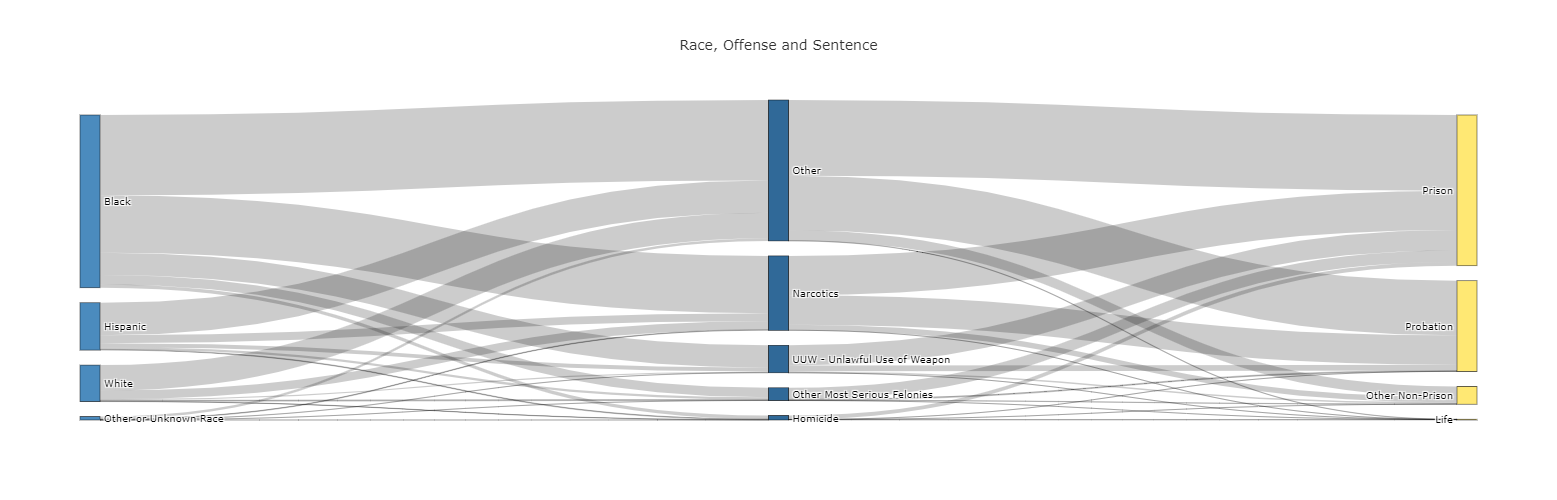

In [279]:
fig = go.Figure(data = [go.Sankey(node = sankey_data['data'][0]['node'],
                             link = sankey_data['data'][0]['link'])])
fig.update_layout(title_text="Race, Offense and Sentence", font_size=10, height=500, width = 800)
fig.layout.template = 'ggplot2'
fig.show()

In [437]:
# import plotly.plotly as py
from plotly.graph_objs import *
# py.sign_in('username', 'api_key')
trace1 = {
  "link": {
    "color": ["rgba(253, 227, 212, 0.5)", "rgba(242, 116, 32, 1)", "rgba(253, 227, 212, 0.5)", "rgba(219, 233, 246, 0.5)", "rgba(73, 148, 206, 1)", "rgba(219, 233, 246,0.5)", "rgba(250, 188, 19, 1)", "rgba(250, 188, 19, 0.5)", "rgba(250, 188, 19, 0.5)", "rgba(127, 194, 65, 1)", "rgba(127, 194, 65, 0.5)", "rgba(127, 194, 65, 0.5)", "rgba(211, 211, 211, 0.5)", "rgba(211, 211, 211, 0.5)", "rgba(211, 211, 211, 0.5)"], 
    "value": [20, 3, 5, 14, 1, 1, 3, 17, 2, 3, 9, 2, 5, 9, 8], 
    "source": [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], 
    "target": [5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7, 5, 6, 7]
  }, 
  "node": {
    "pad": 10, 
    "line": {
      "color": "black", 
      "width": 0
    }, 
    "color": ["#F27420", "#4994CE", "#FABC13", "#7FC241", "#D3D3D3", "#8A5988", "#449E9E", "#D3D3D3", None, None, None, None, None, None, None], 
    "label": ["Remain+No – 28", "Leave+No – 16", "Remain+Yes – 21", "Leave+Yes – 14", "Didn’t vote in at least one referendum – 21", "46 – No", "39 – Yes", "14 – Don’t know / would not vote"], 
    "thickness": 30
  }, 
  "type": "sankey", 
  "domain": {
    "x": [0, 1], 
    "y": [0, 1]
  }, 
  "orientation": "h", 
  "valueformat": ".0f"
}
data = Data([trace1])
layout = {
  "font": {"size": 10}, 
  "title": "Scottish Referendum Voters who now want Independence", 
  "height": 772
}
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig)

C:\Users\minur\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




ValueError: 
    Invalid element(s) received for the 'color' property of sankey.node
        Invalid elements include: [None, None, None, None, None, None, None]

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A list or array of any of the above

In [155]:
sentencing_recategorized.columns

Index(['CASE_ID', 'CASE_PARTICIPANT_ID', 'OFFENSE_CATEGORY', 'PRIMARY_CHARGE',
       'CHARGE_ID', 'CHARGE_VERSION_ID', 'DISPOSITION_CHARGED_OFFENSE_TITLE',
       'DISPOSITION_CHARGED_CHAPTER', 'DISPOSITION_CHARGED_ACT',
       'DISPOSITION_CHARGED_SECTION', 'DISPOSITION_CHARGED_CLASS',
       'DISPOSITION_CHARGED_AOIC', 'DISPOSITION_DATE', 'CHARGE_DISPOSITION',
       'CHARGE_DISPOSITION_REASON', 'SENTENCE_PHASE', 'SENTENCE_DATE',
       'SENTENCE_JUDGE', 'SENTENCE_TYPE', 'CURRENT_SENTENCE',
       'COMMITMENT_TYPE', 'COMMITMENT_TERM', 'COMMITMENT_UNIT', 'COURT_NAME',
       'COURT_FACILITY', 'LENGTH_OF_CASE_in_Days', 'AGE_AT_INCIDENT', 'GENDER',
       'RACE', 'INCIDENT_BEGIN_DATE', 'INCIDENT_END_DATE', 'ARREST_DATE',
       'LAW_ENFORCEMENT_AGENCY', 'UNIT', 'INCIDENT_CITY', 'RECEIVED_DATE',
       'ARRAIGNMENT_DATE', 'UPDATED_OFFENSE_CATEGORY', 'CHARGE_COUNT',
       'categorical_sentence', 'sentence_period_years'],
      dtype='object')

In [273]:
sentencing_recategorized.query("AGE_AT_INCIDENT> 100")

CASE_ID  CASE_PARTICIPANT_ID  \
16213   113399082305         874093514756   
136126  121734719259         976748289445   
183320  125125531378        1021222359178   
207284  126969601938        1046043994094   
212708  127466318331        1052681146648   
229794  129252570052        1076064612631   

                                 OFFENSE_CATEGORY  PRIMARY_CHARGE  \
16213                                   Narcotics            True   
136126                                  Narcotics            True   
183320                                  Narcotics            True   
207284  Driving With Suspended Or Revoked License            True   
212708                             Identity Theft           False   
229794                                  Narcotics            True   

            CHARGE_ID  CHARGE_VERSION_ID  \
16213   1986590358319       451077888939   
136126  2256893232802       513330771251   
183320  2373585184446       549438851347   
207284  2440679477931       555904264907   
212708  2460971055682       560652397389   
229794  2523914046327       575309970702   

                        DISPOSITION_CHARGED_OFFENSE_TITLE  \
16213                POSSESSION OF A CONTROLLED SUBSTANCE   
136126  [POSSESSION OF CANNABIS WITH INTENT TO DELIVER...   
183320               POSSESSION OF A CONTROLLED SUBSTANCE   
207284  FELONY DRIVING WHILE DRIVER?S LICENSE, PERMIT,...   
212708                            POSS FRAUDULENT ID CARD   
229794               POSSESSION OF A CONTROLLED SUBSTANCE   

       DISPOSITION_CHARGED_CHAPTER DISPOSITION_CHARGED_ACT  \
16213                          720                     570   
136126                         720                     550   
183320                         720                     570   
207284                         625                       5   
212708                          15                     335   
229794                         720                     570   

       DISPOSITION_CHARGED_SECTION DISPOSITION_CHARGED_CLASS  \
16213                       402(c)                         4   
136126                        5(c)                         4   
183320                      402(c)                         4   
207284                    6-303(a)                         4   
212708                   14B(b)(1)                         4   
229794                      402(c)                         4   

       DISPOSITION_CHARGED_AOIC       DISPOSITION_DATE CHARGE_DISPOSITION  \
16213                   5101110  4/30/2012 12:00:00 AM     Plea Of Guilty   
136126                  5020200  10/6/2014 12:00:00 AM     Plea Of Guilty   
183320                  5101110  1/26/2017 12:00:00 AM     Plea Of Guilty   
207284                  0014057   9/5/2018 12:00:00 AM     Plea Of Guilty   
212708                  8197140   2/8/2018 12:00:00 AM     Finding Guilty   
229794                  5101110  6/11/2019 12:00:00 AM     Plea Of Guilty   

       CHARGE_DISPOSITION_REASON       SENTENCE_PHASE          SENTENCE_DATE  \
16213                        NaN  Original Sentencing  4/30/2012 12:00:00 AM   
136126                       NaN  Original Sentencing  10/6/2014 12:00:00 AM   
183320                       NaN  Original Sentencing  1/26/2017 12:00:00 AM   
207284                       NaN  Original Sentencing   9/5/2018 12:00:00 AM   
212708                       NaN  Original Sentencing   2/8/2018 12:00:00 AM   
229794                       NaN  Original Sentencing  6/11/2019 12:00:00 AM   

           SENTENCE_JUDGE SENTENCE_TYPE  CURRENT_SENTENCE  \
16213        John T Doody          Jail              True   
136126    Kenneth J Wadas        Prison              True   
183320   Araujo, Mauricio        Prison              True   
207284    Steven J Goebel        Prison              True   
212708  Patrick  Coughlin     Probation              True   
229794    Charles P Burns     Probation              True   

                           COMMITMENT_TYPE  COMMITMENT_TERM COM

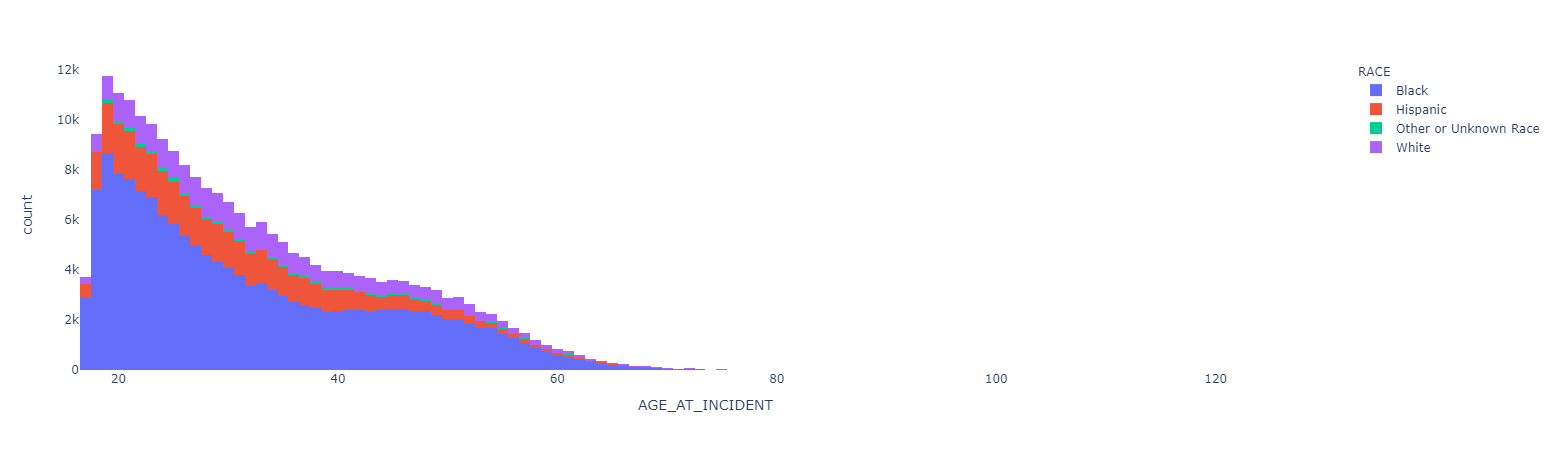

In [300]:
import plotly.express as px
df = px.data.tips()

fig = px.histogram(sentencing_recategorized, x="AGE_AT_INCIDENT", color="RACE")


# fig.update_layout({xaxis_showgrid:False,
#                    yaxis_showgrid:False,
#                    paper_bgcolor:'rgba(0,0,0,0)',
#                    plot_bgcolor:'rgba(0,0,0,0)'})

fig.update_layout({
    'xaxis_showgrid':False,
    'yaxis_showgrid':False,
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

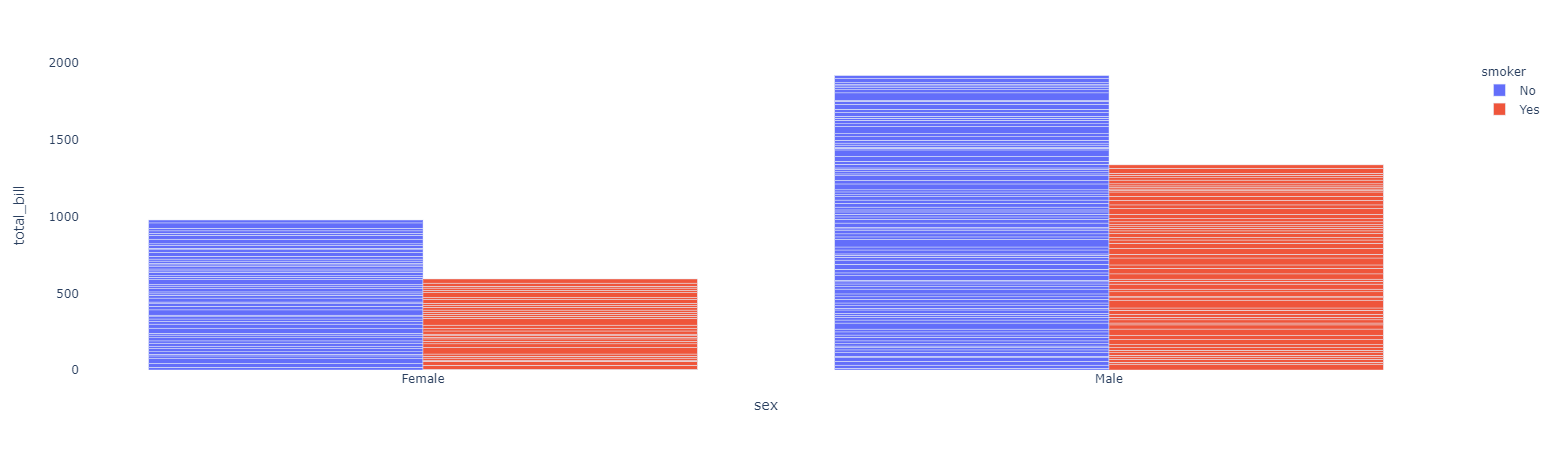

In [294]:
import plotly.express as px
tips = px.data.tips()
fig = px.bar(tips, x='sex', y='total_bill', color='smoker', barmode='group')

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

# In rgba(0,0,0,0) the a letter stands for the alpha channel, so setting it to 0, makes the color transparent.

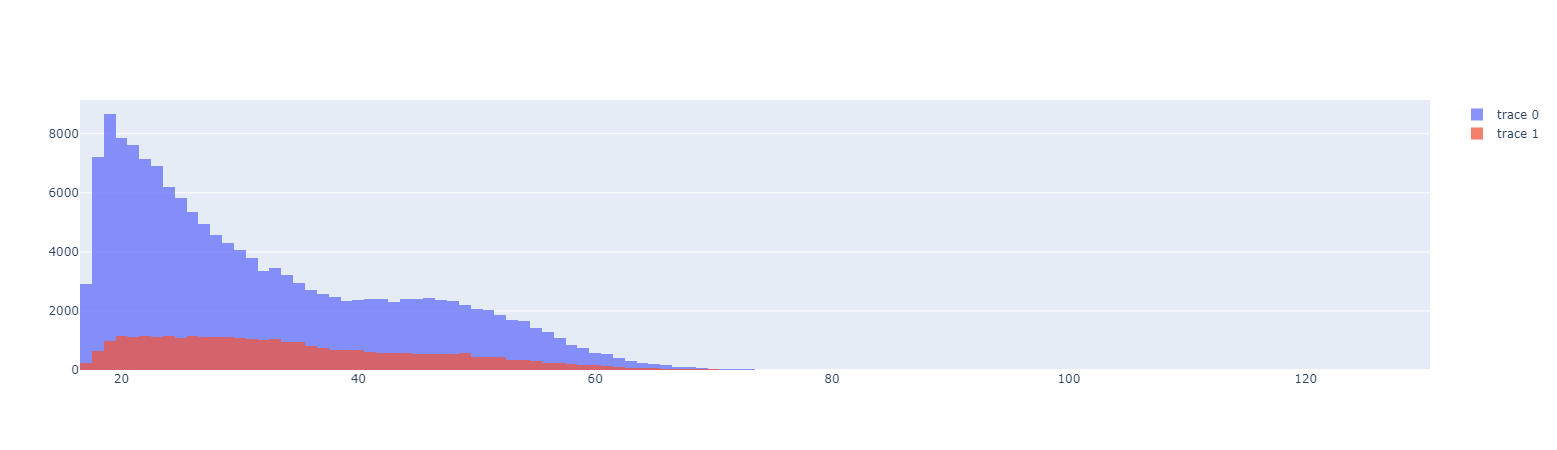

In [276]:
import plotly.graph_objects as go

import numpy as np

x0 = np.random.randn(500)
# Add 1 to shift the mean of the Gaussian distribution
x1 = np.random.randn(500) + 1

fig = go.Figure()
fig.add_trace(go.Histogram(x=sentencing_recategorized.query("RACE == 'Black'")["AGE_AT_INCIDENT"]))
fig.add_trace(go.Histogram(x=sentencing_recategorized.query("RACE == 'White'")["AGE_AT_INCIDENT"]))

# fig.add_trace(go.Histogram(x=x1))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

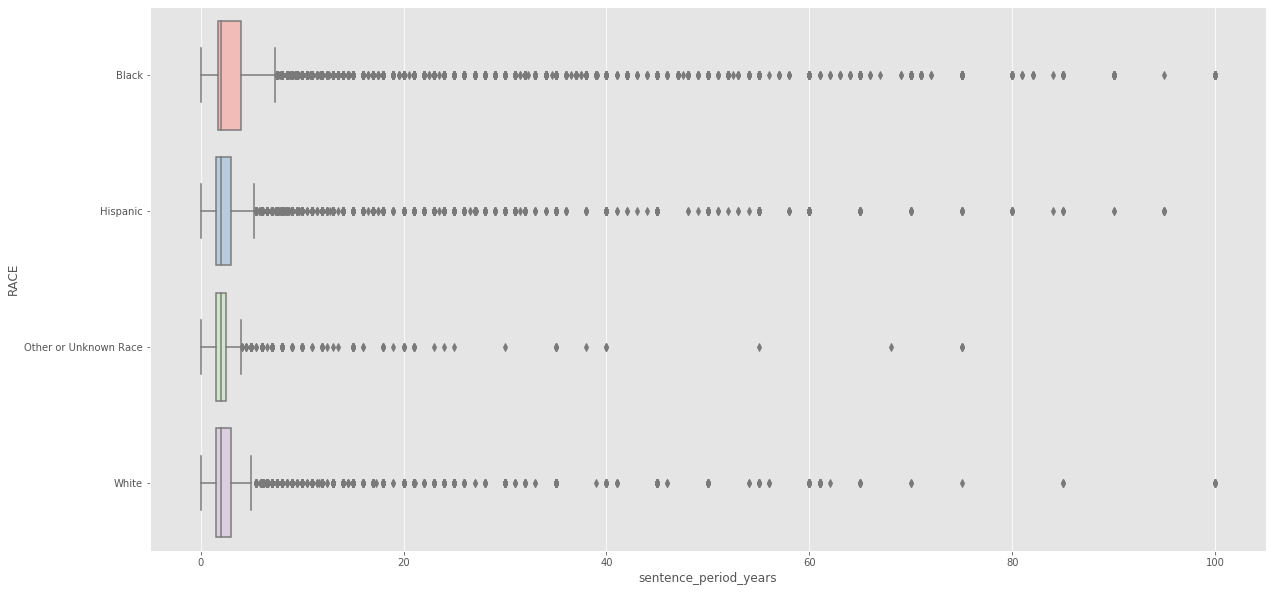

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('tips')
 
# Grouped violinplot
fig, ax = plt.subplots(figsize=(20, 10)) # figsize=(50, 200)
sns.boxplot(ax=ax, x="sentence_period_years", y="RACE", data=sentencing_recategorized, palette="Pastel1")  # stripplot , violinplot, boxplot
# ax.set(xlim=(1,20)) xscale="log"
#sns.plt.show()

In [261]:
np.array([6.3]*len(df))

array([6.3, 6.3, 6.3, ..., 6.3, 6.3, 6.3])

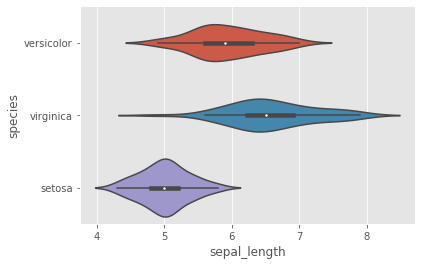

In [157]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')
 
# plot
sns.violinplot(x='sepal_length', y='species', data=df, order=[ "versicolor", "virginica", "setosa"])


Race, age, gender

1. Stacked bar of:
    - percentage of race in population
    - percentage of race by sentencing dataset
2. Violin plot of age at which crimes were commited  

Do a time series analysis using Prophet on count of crimes per race and try to see if it is converging or diverging